# Practica 2: Codificacion sin perdidas

In [66]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image


image_1 = "/Users/carlosedm10/projects/college/TDSC/Files/i1.png"

In [67]:
def image_to_binary(image: str, export_file: str):
    """
    Converts an image into a binary format and writes it to a file.
    """
    # Load the image
    image = plt.imread(image)

    # Ensure the image is in the correct range (0-255) for uint8 if it's a float image
    if image.dtype == np.float32 or image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    elif image.dtype != np.uint8:
        image = image.astype(np.uint8)

    rows, columns, channels = image.shape

    # Open the file in binary write mode
    with open(export_file, "wb") as fid:
        # Write the number of rows, columns, and channels as uint16
        fid.write(np.uint16(rows).tobytes())
        fid.write(np.uint16(columns).tobytes())
        fid.write(np.uint16(channels).tobytes())
        # Write the image data
        fid.write(image.tobytes())


def save_image_as_png(image: np.ndarray, output_file: str):
    """
    Saves a numpy array as a PNG image.
    """
    # Use PIL to save the image
    img = Image.fromarray(image)
    img.save(output_file, format="PNG")


def binary_to_image(binary_file: str, color: bool = False):
    """
    Reads a binary file and returns a black and white version of the image.
    """
    # Open the file in binary read mode
    with open(binary_file, "rb") as fid:
        # Read the number of rows, columns, and channels as uint16
        rows = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])
        columns = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])
        channels = int(np.frombuffer(fid.read(2), dtype=np.uint16)[0])

        # Read the image data
        data = np.frombuffer(fid.read(rows * columns * channels), dtype=np.uint8)

        # Reshape the data to its original dimensions
        image = data.reshape((rows, columns, channels))
        if color:
            return image
        # Convert the image to black and white (grayscale)
        bw_image = np.mean(image, axis=2).astype(np.uint8)
        save_image_as_png(bw_image, "output_bw_image.png")

        return bw_image

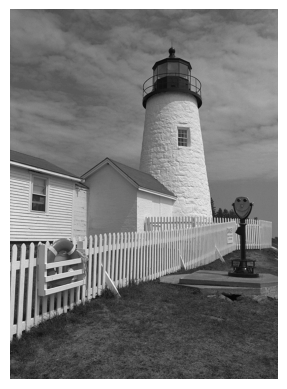

In [68]:
# Importing the image
image_to_binary(image_1, "i1.bin")
decodified_bw = binary_to_image(
    "i1.bin",
)
# Mostrar la imagen en blanco y negro
plt.imshow(decodified_bw, cmap="grey")
plt.axis("off")
plt.show()